ноутбук создан в google colab

# 1. Базовая инфо про токенизаторы

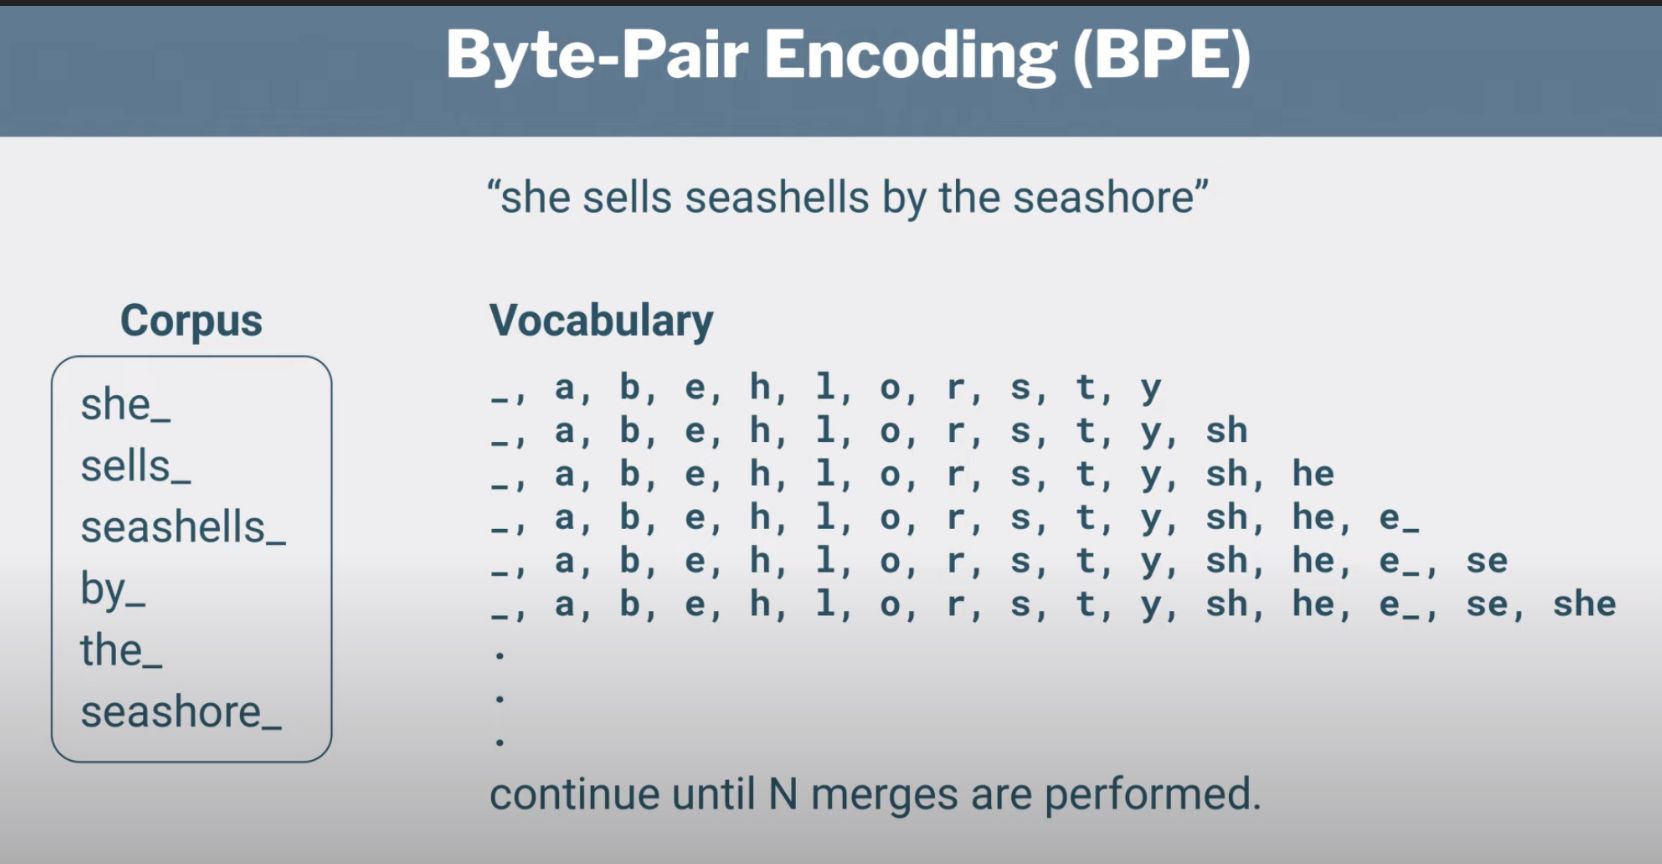

[источник](https://pantelis.github.io/aiml-common/lectures/nlp/nlp-introduction/tokenization/index.html)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import torch
from transformers import (AutoConfig, BertTokenizerFast, AutoTokenizer, AutoModel)

In [ ]:
bert_tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

bert_tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [ ]:
for idx, key in enumerate(bert_tokenizer.vocab):
    print (bert_tokenizer.vocab[key], key)
    if idx == 10:
        break

20966 harald
1713 テ
2607 course
14898 ##baum
22967 ##gues
26934 70th
26395 anarchy
12824 tire
1752 二
19159 ##cturing
24937 saxe


In [ ]:
texts = ['Обычно при использовании API вас прайсят за число токенов'
  , 'Usually API pricing is token-based']

def print_tokens(texts, tokenizer):
  batch = tokenizer.batch_encode_plus(texts
                                              , padding='longest' ## добиваем нулями до макс длины в батче
                                              , truncation=True
                                              , max_length=128
                                              , return_tensors="pt")

  for idx, text in enumerate(texts):
    print(text, '\n', 'Число токенов ', torch.count_nonzero(batch['input_ids'][idx]), '\n', batch['input_ids'][idx],  '\n')

In [ ]:
print_tokens(texts, bert_tokenizer)

Обычно при использовании API вас прайсят за число токенов 
 Число токенов  tensor(45) 
 tensor([  101,  1193, 29740, 29113, 29752, 18947, 14150,  1194, 16856, 10325,
         1188, 29747, 29746, 14150, 29436, 23742, 29744, 19259, 28995, 15414,
        17928,  1182, 10260, 29747,  1194, 16856, 10260, 10325, 29747, 17432,
        22919,  1187, 10260,  1202, 10325, 29747, 29436, 14150,  1197, 14150,
        23925, 15290, 18947, 19259,   102]) 

Usually API pricing is token-based 
 Число токенов  tensor(9) 
 tensor([  101,  2788, 17928, 20874,  2003, 19204,  1011,  2241,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]) 



In [ ]:
print_tokens([texts[1]], bert_tokenizer)

Usually API pricing is token-based 
 Число токенов  tensor(9) 
 tensor([  101,  2788, 17928, 20874,  2003, 19204,  1011,  2241,   102]) 



Итого, 9 токенов против 45 -- стоимость будет отличаться в 5 раз

попробуем другой токенизатор

In [ ]:
from transformers import RobertaTokenizerFast

roberta_tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')

In [ ]:
print_tokens(texts, roberta_tokenizer)

Обычно при использовании API вас прайсят за число токенов 
 Число токенов  tensor(62) 
 tensor([    0, 25417, 17772, 25417, 15389, 46800, 22063,  6382, 36765, 34251,
        18697,  9470, 24269, 35328, 18697, 18537, 36709, 25417,  9470, 41613,
         2023, 47015, 25417, 18400, 41613, 14292, 26161, 36765, 35328, 35328,
        21013, 18697, 14292, 26161, 36709, 18697,  9470, 24269, 26161, 25417,
         9253, 36709, 33162, 35555, 18697, 18400, 26161,  1437, 22063,  6382,
        35328, 36709, 40966, 34251,  1437, 35555, 41613,  3070, 25482, 36765,
        41613, 14292,     2]) 

Usually API pricing is token-based 
 Число токенов  tensor(62) 
 tensor([    0, 35808, 21013,  5024,    16, 19233,    12,   805,     2,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,

In [ ]:
print_tokens([texts[1]], roberta_tokenizer)

Usually API pricing is token-based 
 Число токенов  tensor(8) 
 tensor([    0, 35808, 21013,  5024,    16, 19233,    12,   805,     2]) 



уже 62 vs 8 -- здесь разница почти в 8 раз !!!

# 2. Стоит ли связываться со сменой токенизатора?

## 2.1. Обучение токенизатора

Если очень хочется -- можно обучить свой токенизатор с помощью

```
from tokenizers import ByteLevelBPETokenizer
```
А затем использовать его через



```
from transformers import PreTrainedTokenizerFast
```





In [ ]:
texts = [
  'возьмем немного текста из анонсов курса'
  , """
  Согласно Gartner https://www.gartner.com/en/newsroom/press-releases/2024-10-21-gartner-identifies-the-top-10-strategic-technology-trends-for-2025 , ИИ-агенты – это топ#1 технологический тренд в 2025 году.
  Несмотря на то, что агентские системы известны с прошлого века, и все это время применялись в производстве и логистике, широкое распространение LLM дало новый импульс технологии – и как универсальный оркестратор агента – то есть составление под каждый входящий запрос последовательности действий – планирования пайплайна – состоящего из применения инструментов и/или обращения к другим агентам – и как инструмент, позволяющий легко производить настройку LLM на естественном языке.
  Поэтому в курсе на первом занятии мы рассмотрим как выбрать конкретную LLM с учетом имеющихся ограничений, как развернуть ее локально и стоит ли использовать API, как оценить стоимость такого решения и от чего зависит то самое число токенов, по которому ведется прайсинг (а остатся без денег неожиданно легко – как случилось с автором этого поста https://t.me/datarascals/219 ). Упомням как борются с галлюцинациями и повышают точность ответов LLM. Порассуждаем зачем агентам память если уже есть LLM с конктекстом до 10М токенов.  И, чтобы не затягивать – проведем м первое знакомство с тулами и соберем первый агент.

  Про второе занятие
  Про RAG (Retrieval Augmented Generation) слышал, наверное, каждый, ведь уже 2 года это самый массовый способ применения LLM в проде для бизнеса. Это значит, что точность и надежность такого решения достаточно предсказуемы для того чтобы исключить человека из процесса аппрува выдачи LLM, а связка «локально развернутая LLM + RAG над корпоративными документами» обеспечивает достаточную конфиденциальность чтобы снять тревожность «что наши данные попадут в OpenA» Эта история настолько популярна, что на рынке есть готовые RAG-решения, а опенсорс модели (правда, «маленькие» — до 5B, обзавелись своей RAG-ареной https://huggingface.co/spaces/aizip-dev/SLM-RAG-Arena).
  На втором занятии мы соберем свой RAG-пайплайн на своих данных, обсудим,  почему качество такой системы нельзя измерять «на глаз», как правильно собрать схему LLM as a Judge и подготовить дотаяет для нее, что такое guardrails и что делать когда LLM не знает ответ.
  Посмотрим на схему агентского RAG и обсудим можно ли применять RAG в качестве памяти агента.
  """
 ]

with open("texts.txt", "w", encoding="utf-8") as f:
    for line in texts:
        f.write(line + "\n")

In [ ]:
from tokenizers import ByteLevelBPETokenizer
files = ["texts.txt"] # Путь к файлу с текстами для обучения
course_tokenizer = ByteLevelBPETokenizer()
course_tokenizer.train(files, vocab_size=30_000, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])
course_tokenizer.save_model(".")

['./vocab.json', './merges.txt']

In [ ]:
course_tokenizer = ByteLevelBPETokenizer(
    "./vocab.json",
    "./merges.txt",
)

course_tokenizer.save("./course_tokenizer.json")

### проверим

In [ ]:
from transformers import PreTrainedTokenizerFast
course_tokenizer_fast = PreTrainedTokenizerFast(tokenizer_file="./course_tokenizer.json")

In [ ]:
special_tokens = {
    "pad_token": "[PAD]",
    "cls_token": "[CLS]",
    "sep_token": "[SEP]",
    "mask_token": "[MASK]",
    "unk_token": "[UNK]",
}
for k in special_tokens:
    print(f"{k}: {getattr(course_tokenizer_fast, k)} -> id: {getattr(course_tokenizer_fast, k + '_id')}")

pad_token: None -> id: None
cls_token: None -> id: None
sep_token: None -> id: None
mask_token: None -> id: None
unk_token: None -> id: None


In [ ]:
course_tokenizer_fast.add_special_tokens(special_tokens)

5

In [ ]:
for k in special_tokens:
    print(f"{k}: {getattr(course_tokenizer_fast, k)} -> id: {getattr(course_tokenizer_fast, k + '_id')}")

pad_token: [PAD] -> id: 601
cls_token: [CLS] -> id: 602
sep_token: [SEP] -> id: 603
mask_token: [MASK] -> id: 604
unk_token: [UNK] -> id: 605


In [ ]:
import os
save_dir = "course_tokenizer_fixed"
os.makedirs(save_dir, exist_ok=True)
course_tokenizer_fast.save_pretrained(save_dir)

('course_tokenizer_fixed/tokenizer_config.json',
 'course_tokenizer_fixed/special_tokens_map.json',
 'course_tokenizer_fixed/tokenizer.json')

 ## 2.2. FineTune BERT на наш кастомный токенизатор

In [ ]:
from transformers import PreTrainedTokenizerFast

course_tokenizer = PreTrainedTokenizerFast(
    tokenizer_file="course_tokenizer_fixed/tokenizer.json",
    unk_token="[UNK]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    sep_token="[SEP]",
    mask_token="[MASK]",
)

In [ ]:
from transformers import BertForMaskedLM

model = BertForMaskedLM.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
try:
    from transformers.optim import AdamW
except ImportError:
    try:
        from transformers import AdamW
    except ImportError:
        try:
            from transformers.optimization import AdamW
        except ImportError:
            from torch.optim import AdamW
        else:
            print('no AdamW')

In [ ]:
optimizer = AdamW(model.parameters(), lr=5e-5)

In [ ]:
from torch.utils.data import DataLoader
from transformers import DataCollatorForLanguageModeling
import torch

orig_vocab_size = model.config.vocab_size

# # Добавляем новые токены из кастомного токенизатора в модель

added_tokens = list(course_tokenizer.get_vocab().keys())[orig_vocab_size:]
num_added_tokens = course_tokenizer.add_tokens(added_tokens)

if num_added_tokens > 0:
    model.resize_token_embeddings(orig_vocab_size + num_added_tokens)



# тексты для обучения должны быть из того же корпуса, на котором учили токенизатор
texts = None
with open("texts.txt", "r", encoding="utf-8") as f:
    texts = [line.strip() for line in f if line.strip()]


encodings = course_tokenizer(texts, truncation=True, padding=True, return_tensors="pt")

# Data collator для MLM (masked language modeling)
data_collator = DataCollatorForLanguageModeling(tokenizer=course_tokenizer, mlm=True, mlm_probability=0.15)

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings.input_ids)

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

dataset = TextDataset(encodings)
loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=data_collator)



# в колабе у нас есть небольшой ресурс GPU, переключить можно в разделе "среда выполнения", но потребует перезапуска сеанса (и код заново исполнить придется)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

optimizer = AdamW(model.parameters(), lr=5e-5)

epochs = 5
for epoch in range(epochs):
    for batch in loader:
        inputs = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**inputs)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        print(f"Epoch {epoch} Loss: {loss.item()}")


Epoch 0 Loss: 13.866910934448242
Epoch 1 Loss: 8.838172912597656
Epoch 2 Loss: 7.137530326843262
Epoch 3 Loss: 6.8805012702941895
Epoch 4 Loss: 6.839742183685303


# 3. Выводы  

Токенизация критически важна в AI-агентах -- как для оценки стоимости использованиях внешних API, так и адаптации под специфику именно вашего кейса.

Число токенов, в которое превратится ваш запрос зависит и от токенизатора и от языка запроса (в примере с roberta число токенов отличалось почти в 8 раз на английском и русском языках на одну и ту же фразу). Если в вашем сеттинге используются специфические аббревиатуры / лексика и прочее -- можно добавить токены в токенизатор.

В случае простого добавления токенов в токенизаторов модель (LLM) придется фанйтюнить, это не радикально страшно, но потребует контроля изменения метрик качества на разных датасетах.

Будьте аккуратны с токенайзерами и их дообучением.
Пример того, что может пойти не так (смещение данных в проде):
- новый токенайзер выучил русские слова
- справляется лучше (против bert)
- на проде много новых форм (морфология, падежи..)
- на проде английские слова      

как итог -- токенизируются посимвольно, неоправданно растет число токенов




# 4. Дополнительные материалы для самостоятельного изучения

https://sebastianraschka.com/blog/2025/bpe-from-scratch.html?utm_source=chatgpt.com

https://huggingface.co/docs/transformers/en/tokenizer_summary?utm_source=chatgpt.com

Зачем нужны резервные токены [unusedX], например

https://huggingface.co/facebook/rag-token-base/blob/main/question_encoder_tokenizer/vocab.txt ?